In [128]:
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import math
import os
from collections import defaultdict
from matplotlib.patches import Rectangle
from matplotlib.patches import Rectangle
import numpy as np
import pylab as P


In [140]:
def compute_ripley(path):
    regex = re.compile(r"(\d+):\s+(\d+\.\d+):(\d+)")
    collapsed_count_lst_dct = defaultdict(list)
    random_count_lst_dct = defaultdict(list)

    ripleys = [ripley for ripley in os.listdir(path) if 'collapsed' not in ripley]

    for ripley in ripleys:
        with open(os.path.join(path, ripley)) as f:
            print(ripley)
            for line in f:
                line = line.rstrip('\n')
                r = re.search(regex, line)
                if r is not None:
                    random_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
                else:
                    print(line)
    with open(os.path.join(path, 'ripley_collapsed.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                collapsed_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
    #print(random_count_lst_dct)
    random_count_arr = []
    for k in random_count_lst_dct.keys():
        random_count_arr.append(random_count_lst_dct[k])
    random_count_arr = np.asarray(random_count_arr)
    print(random_count_arr.shape)
    collapsed_count_arr = []
    for k in collapsed_count_lst_dct.keys():
        collapsed_count_arr.append(collapsed_count_lst_dct[k])
    collapsed_count_arr = np.asarray(collapsed_count_arr)
    print(collapsed_count_arr.shape)
    k = np.mean(collapsed_count_arr, axis=0)
    low = np.percentile(random_count_arr, 2.5, axis=0)
    high = np.percentile(random_count_arr, 47.5, axis=0)
    return k, low, high

In [165]:
d_lst = list(pl.frange(0.1,0.5,0.01))
k_pggan_ffhq, l_pggan_ffhq, h_pggan_ffhq = compute_ripley('legacy/pggan/monte_carlo_sampling_10m_ffhq/ripley')
k_pggan_celebahq, l_pggan_celebahq, h_pggan_celebahq = compute_ripley('legacy/pggan/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_celebahq, l_sgan_celebahq, h_sgan_celebahq = compute_ripley('legacy/sgan/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_ffhq, l_sgan_ffhq, h_sgan_ffhq = compute_ripley('legacy/sgan/monte_carlo_sampling_10m_ffhq/ripley')

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


In [211]:
def plot_ripley(k,l,h,fig_name,shaded=True):
    d_lst = list(pl.frange(0.1,0.5,0.01))
    k = P.plot(d_lst, k, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}$')[0]
    if shaded:
        P.fill_between(d_lst, l, h, color='b', alpha=0.5, label="filled_region")
        rect = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)
        P.legend([k, rect], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True, facecolor='white', framealpha=1)
    else:
        line1 = P.plot(d_lst, l, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(\mathcal{N}_{R_{ref}})$')[0]
        line2 = P.plot(d_lst, h, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(\mathcal{N}_{R_{ref}})$')[0]
        plt.legend(loc='center right', shadow=True, facecolor='white', framealpha=1)
    #P.yticks([])
    P.yticks(np.arange(0, 7, 0.5))
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-CelebAHQ-1024")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)
    #P.show()

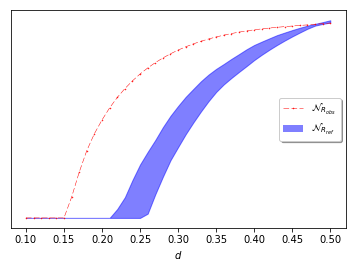

In [212]:
plot_ripley(k=k_sgan_celebahq, l=l_sgan_celebahq, h=h_sgan_celebahq, fig_name='SGAN_CelebAHQ_1024.pdf', shaded=True)

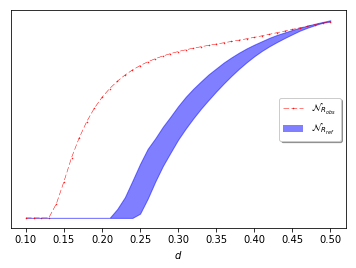

In [213]:
plot_ripley(k=k_sgan_ffhq, l=l_sgan_ffhq, h=h_sgan_ffhq, fig_name='SGAN_FFHQ_1024.pdf', shaded=True)

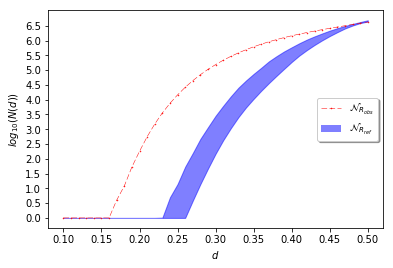

In [168]:
plot_ripley(k=k_pggan_celebahq, l=l_pggan_celebahq, h=h_pggan_celebahq, fig_name='PGGAN_CelebAHQ_1024.pdf', shaded=True)

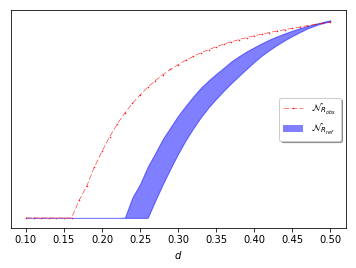

In [214]:
plot_ripley(k=k_pggan_ffhq, l=l_pggan_ffhq, h=h_pggan_ffhq, fig_name='PGGAN_FFHQ_1024.pdf', shaded=True)

In [215]:
def plot_ripley_combined(k_min,k_max,l,h,fig_name):
    d_lst = list(pl.frange(0.1,0.5,0.01))
    P.fill_between(d_lst, k_min, k_max, color='r', alpha=0.5, label="filled_region_obs")
    P.fill_between(d_lst, l, h, color='b', alpha=0.5, label="filled_region_ref")

    rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
    rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

    P.yticks(np.arange(0, 7, 0.5))
    #P.yticks([])
    P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], 
             loc='center right', shadow=True, facecolor='white', framealpha=1)
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-Randomness-128")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)
    #P.show()

ripley_0.txt
(100, 41)
(100, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


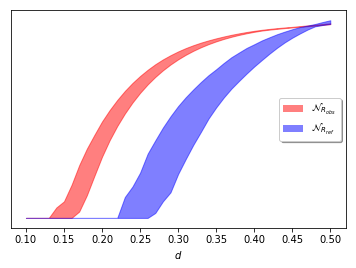

In [216]:
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_2/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_3/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_4/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_5/ripley')
k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5], axis=0), axis=0)

plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Randomness_128.pdf')

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


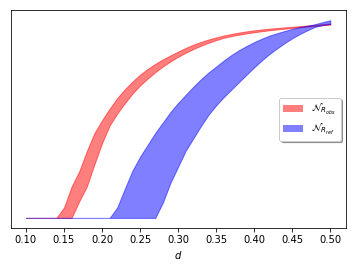

In [217]:
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5, l_sgan_6, l_sgan_7, l_sgan_8], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5, h_sgan_6, h_sgan_7, h_sgan_8], axis=0), axis=0)
plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Finetune_128.pdf')

ripley_0.txt
(100, 41)
(100, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


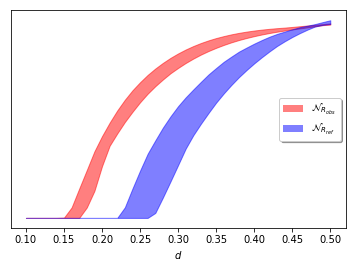

In [218]:
k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_256, l_sgan_256, h_sgan_256 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_256_1/ripley')
k_sgan_512, l_sgan_512, h_sgan_512 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_512_1/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_1024_1/ripley')

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_256, l_sgan_512, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_256, h_sgan_512, h_sgan_1024], axis=0), axis=0)
plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Architecture.pdf')

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


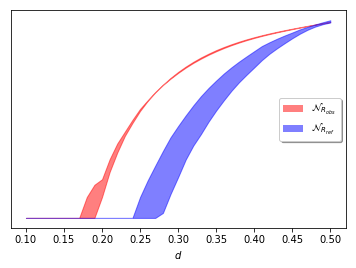

In [219]:
k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('legacy/pggan/monte_carlo_sampling_1m_128/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('legacy/pggan/monte_carlo_sampling_1m_1024/ripley')

k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_1024], axis=0), axis=0)

plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='PGGAN_Architecture.pdf')

In [187]:
def plot_ripley_calibration(k1,k2,l1,h1,l2,h2,fig_name):
    d_lst = list(pl.frange(0.1,0.5,0.01))
    
    k1 = P.plot(d_lst, k1, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}$')[0]
    k2 = P.plot(d_lst, k2, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}^\prime$')[0]
    P.fill_between(d_lst, l1, h1, color='r', alpha=0.5, label="filled_region_ref_1")
    P.fill_between(d_lst, l2, h2, color='b', alpha=0.5, label="filled_region_ref_2")

    rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
    rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

    P.yticks(np.arange(0, 7, 0.5))
    P.legend([k1, k2, rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{obs}}^\prime$',
                                        r'$\mathcal{N}_{R_{ref}}$', r'$\mathcal{N}_{R_{ref}}^\prime$'], 
             loc='center right', shadow=True, facecolor='white', framealpha=1)
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-Randomness-128")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)

In [188]:
k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('legacy/sgan/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)
ripley_0.txt
(100, 41)
(1, 41)


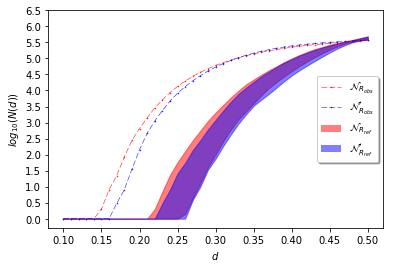

In [189]:
plot_ripley_calibration(k1=k_sgan_1, k2=k_sgan_4, l1=l_sgan_1, h1=h_sgan_1, l2=l_sgan_4, h2=h_sgan_4 , fig_name='CelebAHQ_GMM_128.pdf')

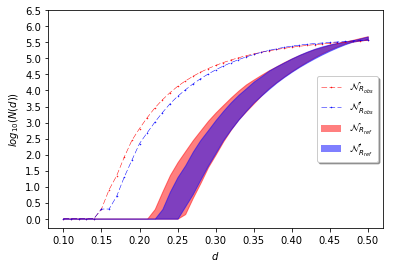

In [190]:
plot_ripley_calibration(k1=k_sgan_1, k2=k_sgan_5, l1=l_sgan_1, h1=h_sgan_1, l2=l_sgan_5, h2=h_sgan_5 , fig_name='CelebAHQ_IS_128.pdf')